# Exploratory analysis of the WISDM dataset 

In [199]:
import os 
import numpy as np 
import pandas as pd 
import random 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import scipy as sp 
%pylab inline 
import tqdm 

Populating the interactive namespace from numpy and matplotlib
C:\Users\abhi\anaconda3\envs\dl\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [7]:
os.getcwd()
files = os.listdir('../data/WISDM')

In [8]:
out = []
for each_file in files: 
    tmp = pd.read_csv(os.path.join('../data/WISDM', each_file))
    out.append(tmp)
out = pd.concat(out )

In [9]:
print(out.shape)
out.head()

(1098208, 6)


,user,activity,timestamp,x,y,z
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [10]:
print( 'Total number of users : {0}'.format(len(out['user'].unique())))
print( 'Total number of activities : {0}'.format(len(out['activity'].unique())))

Total number of users : 36
Total number of activities : 6


In [11]:
activity_map={}
activity_map['Walking']=1
activity_map['Jogging']=2 
activity_map['Upstairs']= 3
activity_map['Downstairs']= 4
activity_map['Sitting']= 5
activity_map['Standing'] = 6

# out['encoded_activity'] = out['activity'].map(activity_map)

In [208]:
# perform aggregations first. 
def average_slice(df_, NUM_SAMPLE = 128):
    """prepare time slices and 
    average over each time slice. 
    """
    out = []
    num_groups = df_.shape[0] // NUM_SAMPLE
    for i in range(0, df_.shape[0], NUM_SAMPLE): 
        idx = (i , min(df_.shape[0], i + NUM_SAMPLE))    
        tmp = df_.iloc[idx[0]:idx[1], :]
        averaged = pd.DataFrame(tmp.iloc[:, -3:].apply(np.mean)).T
        averaged.columns = [i + '_mean' for i in averaged.columns]
        sd = pd.DataFrame(tmp.iloc[:, -3:].apply(np.std)).T
        sd.columns = [i + '_sd' for i in sd.columns]
        skewness = pd.DataFrame(tmp.iloc[:, -3:].apply(sp.stats.skew)).T
        skewness.columns = [i + '_skew' for i in skewness.columns]
        out.append(pd.concat([averaged, sd, skewness, tmp.iloc[:1, :-3].reset_index(drop = True)], axis = 1))
    out = pd.concat(out)
    out['encoded_activity'] = out['activity'].map(activity_map).apply(int)
    out.index = range(out.shape[0])
    return out

In [211]:
agg_data = []
grpdata = out.groupby(['user', 'activity'])
for i, dt in tqdm.tqdm(grpdata):
    agg_data.append(average_slice(dt, 128))
agg_data = pd.concat(agg_data)
print(agg_data.shape)
agg_data.head()

100%|██████████| 179/179 [00:50<00:00,  3.52it/s](8669, 13)



,x_mean,y_mean,z_mean,x_sd,y_sd,z_sd,x_skew,y_skew,z_skew,user,activity,timestamp,encoded_activity
0,-2.557656,9.653672,1.688203,3.663728,4.399279,4.556382,0.378699,0.229452,0.681862,1,Downstairs,6552942304000,4
1,-8.073516,6.721172,0.954922,5.429729,5.096118,3.850596,0.238717,0.166304,0.531660,1,Downstairs,6559302320000,4
2,-8.694141,5.791250,0.873359,5.140313,5.135565,3.656514,0.189108,0.406382,0.598043,1,Downstairs,6565702344000,4
3,-9.133516,5.487656,0.879219,4.966624,4.583411,3.719114,0.384774,0.379390,0.635977,1,Downstairs,6572122358000,4
4,-8.901875,5.450938,0.883672,4.810260,4.535813,3.543700,0.414596,0.644140,0.652242,1,Downstairs,6578522321000,4


In [229]:
agg_data.iloc[:, :9]

,x_mean,y_mean,z_mean,x_sd,y_sd,z_sd,x_skew,y_skew,z_skew
0,-2.557656,9.653672,1.688203,3.663728,4.399279,4.556382,0.378699,0.229452,0.681862
1,-8.073516,6.721172,0.954922,5.429729,5.096118,3.850596,0.238717,0.166304,0.531660
2,-8.694141,5.791250,0.873359,5.140313,5.135565,3.656514,0.189108,0.406382,0.598043
3,-9.133516,5.487656,0.879219,4.966624,4.583411,3.719114,0.384774,0.379390,0.635977
4,-8.901875,5.450938,0.883672,4.810260,4.535813,3.543700,0.414596,0.644140,0.652242
...,...,...,...,...,...,...,...,...,...
44,-0.978984,9.855234,0.767847,2.223068,2.991289,3.236086,0.343712,-0.111502,1.248634
45,-0.715000,9.781172,0.563116,2.177094,3.495355,3.357960,0.141882,-0.142000,1.308301
46,-0.889687,9.967500,0.552369,2.024126,2.853980,2.878874,0.462022,-0.074953,1.361201
47,-0.688438,9.817656,0.881705,2.010140,2.534663,2.901855,0.298423,0.069812,1.182847


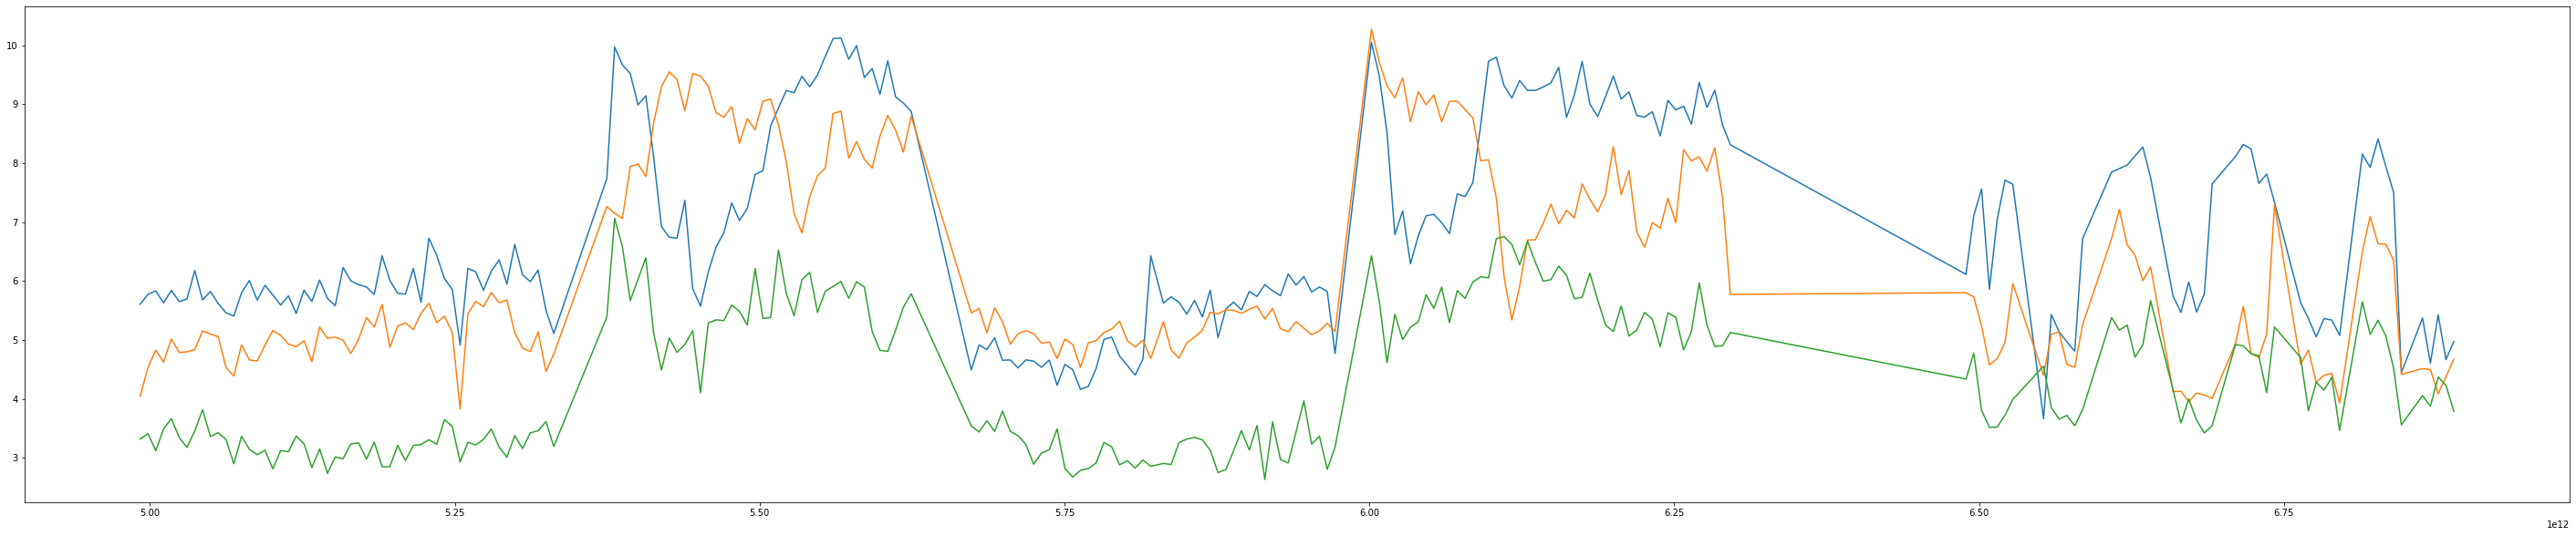

In [213]:
user = 1
userdata = agg_data[agg_data['user']==user]
userdata = userdata.sort_values('timestamp', ascending = True)
plt.figure(figsize=(50, 10))
plt.plot(userdata['timestamp'], userdata['x_sd'])
plt.plot(userdata['timestamp'], userdata['y_sd'])
plt.plot(userdata['timestamp'], userdata['z_sd'])

In [215]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(projection = '3d')
# ax.scatter(userdata['x'], userdata['y'], userdata['z'], c= userdata['encoded_activity'])
# ax.legend(['1', '2'])
agg_data.iloc[:, :-4]

,x_mean,y_mean,z_mean,x_sd,y_sd,z_sd,x_skew,y_skew,z_skew
0,-2.557656,9.653672,1.688203,3.663728,4.399279,4.556382,0.378699,0.229452,0.681862
1,-8.073516,6.721172,0.954922,5.429729,5.096118,3.850596,0.238717,0.166304,0.531660
2,-8.694141,5.791250,0.873359,5.140313,5.135565,3.656514,0.189108,0.406382,0.598043
3,-9.133516,5.487656,0.879219,4.966624,4.583411,3.719114,0.384774,0.379390,0.635977
4,-8.901875,5.450938,0.883672,4.810260,4.535813,3.543700,0.414596,0.644140,0.652242
...,...,...,...,...,...,...,...,...,...
44,-0.978984,9.855234,0.767847,2.223068,2.991289,3.236086,0.343712,-0.111502,1.248634
45,-0.715000,9.781172,0.563116,2.177094,3.495355,3.357960,0.141882,-0.142000,1.308301
46,-0.889687,9.967500,0.552369,2.024126,2.853980,2.878874,0.462022,-0.074953,1.361201
47,-0.688438,9.817656,0.881705,2.010140,2.534663,2.901855,0.298423,0.069812,1.182847


In [216]:
X = agg_data.iloc[:, :-4].values
Y = agg_data['encoded_activity'].values

In [217]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(6501, 9)
(6501,)
(2168, 9)


In [219]:
rf = RandomForestClassifier(verbose = 1, n_jobs = -1)
rf.fit(x_train, y_train)
from sklearn.metrics import classification_report
outs = rf.predict(x_test)
print(classification_report(y_test, outs))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
              precision    recall  f1-score   support

           1       0.95      0.98      0.96       840
           2       0.97      0.99      0.98       665
           3       0.86      0.78      0.82       242
           4       0.88      0.79      0.83       211
           5       1.00      0.97      0.99       104
           6       0.98      1.00      0.99       106

    accuracy                           0.94      2168
   macro avg       0.94      0.92      0.93      2168
weighted avg       0.94      0.94      0.94      2168

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [220]:
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim 

In [221]:
class Model(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.stack = nn.Sequential(nn.Linear(9, 256), 
                    nn.ReLU(), 
                    nn.Dropout(),
                    nn.Linear(256, 256), 
                    nn.ReLU(), 
                    nn.Dropout(), 
                    nn.Linear(256, 6))
    def forward(self, x): 
        out = self.stack(x)
        return out 

In [223]:
model = Model()
x = torch.randn((1, 9))
print(x)
model(x)

tensor([[ 0.7273,  0.7554,  0.9576, -2.8317, -0.9582, -0.1429,  0.5757, -1.3019,
          0.5590]])


tensor([[-0.1486,  0.3732, -0.4379,  0.3249,  0.2341,  0.1373]],
       grad_fn=<AddmmBackward>)

In [224]:
optimizer = optim.Adam(model.parameters())
loss_fun = nn.CrossEntropyLoss()

In [225]:
class MyData(Dataset):
    def __init__(self, x, y): 
        self.x = x
        self.y = y
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, idx): 
        x = self.x[idx,  ]
        y = self.y[idx]
        y = y.reshape(-1, 1)
        y= y.astype(np.uint8)
        x = torch.FloatTensor(x)
        y = torch.LongTensor(y)
        return x, y

In [226]:
data = MyData(x_train, y_train)
trainloader = DataLoader(data, batch_size = 256)
# next(iter(trainloader))

In [227]:
for i in tqdm.tqdm(range(500)): 
    for j, (x_t, y_t) in enumerate(trainloader):
        logits = model(x_t)
        loss = loss_fun(logits, y_t.squeeze() - 1)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100%|██████████| 500/500 [01:51<00:00,  4.48it/s]


In [228]:
# val. 
with torch.no_grad():
    test_y = torch.max(model(torch.FloatTensor(x_test)), 1)[1] + 1
print(classification_report(y_test, test_y.numpy()))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96       840
           2       0.96      0.98      0.97       665
           3       0.80      0.74      0.77       242
           4       0.84      0.81      0.83       211
           5       0.99      0.94      0.97       104
           6       0.96      0.99      0.98       106

    accuracy                           0.93      2168
   macro avg       0.92      0.91      0.91      2168
weighted avg       0.93      0.93      0.93      2168



torch.Size([12935, 3])

tensor([1, 2, 3,  ..., 3, 1, 2])